In [94]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from pylab import rcParams
#
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
import os
print ("libraries loaded.")

libraries loaded.


In [93]:
print (os.getcwd())

D:\2017_working\gitrepos\ML_time_series_training


In [18]:
# load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(filename, names=names)
print (type(dataframe), dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (768, 9)


In [19]:
print (names)
print ("Unique values")
for name in names:
    print(name, ":", dataframe[name].unique().shape[0])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
Unique values
preg : 17
plas : 136
pres : 47
skin : 51
test : 186
mass : 248
pedi : 517
age : 52
class : 2


In [20]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
print (type(X), X.shape)
print (type(Y), Y.shape)

<class 'numpy.ndarray'> (768, 8)
<class 'numpy.ndarray'> (768,)


In [7]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
print (type(models), len(models), type(models[0]))
print ("models setup completed.")

<class 'list'> 6 <class 'tuple'>
models setup completed.


In [27]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
#nb: models is a list of tuples.
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
	print ("type(cv_results):", type(cv_results), cv_results.shape)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f) max=%f, min=%f" % (name, cv_results.mean(), cv_results.std(), cv_results.max(), cv_results.min())
	print(msg)
print ("loop through models type completed.")


type(cv_results): <class 'numpy.ndarray'> (10,)
LR: 0.769515 (0.048411) max=0.857143, min=0.701299
type(cv_results): <class 'numpy.ndarray'> (10,)
LDA: 0.773462 (0.051592) max=0.844156, min=0.675325
type(cv_results): <class 'numpy.ndarray'> (10,)
KNN: 0.726555 (0.061821) max=0.831169, min=0.636364
type(cv_results): <class 'numpy.ndarray'> (10,)
CART: 0.689986 (0.064204) max=0.779221, min=0.584416
type(cv_results): <class 'numpy.ndarray'> (10,)
NB: 0.755178 (0.042766) max=0.818182, min=0.675325
type(cv_results): <class 'numpy.ndarray'> (10,)
SVM: 0.651025 (0.072141) max=0.818182, min=0.558442
loop through models type completed.


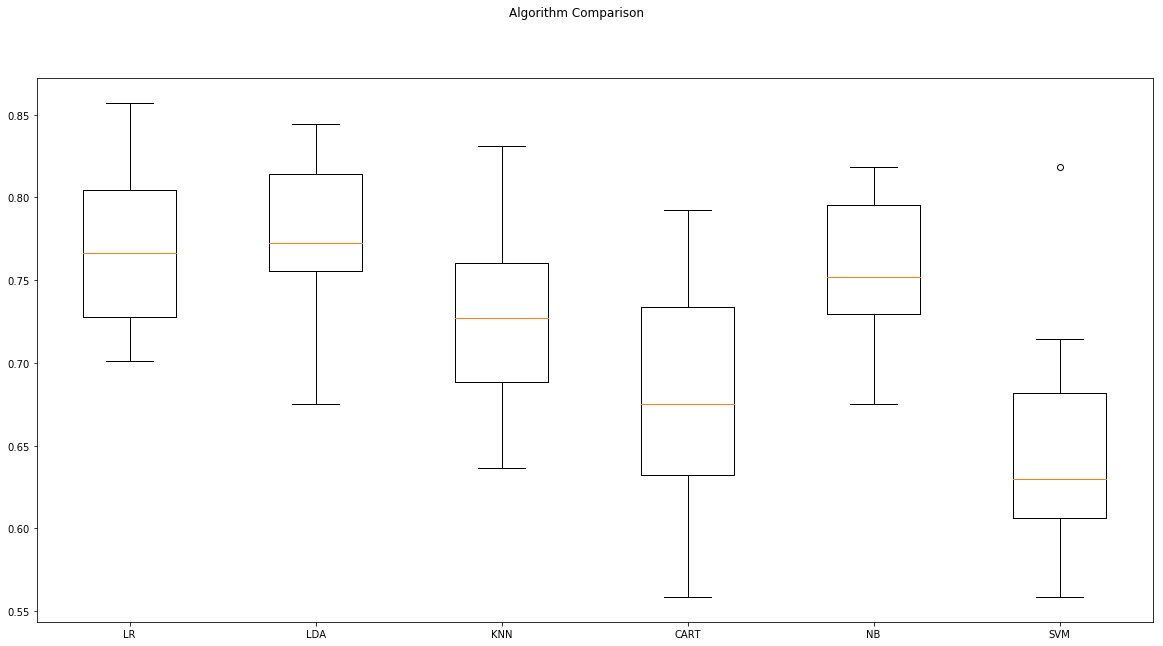

In [16]:
# boxplot algorithm comparison
rcParams['figure.figsize'] = 20, 10
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LogisticRegression  
LinearDiscriminantAnalysis  
KNeighborsClassifier  
DecisionTreeClassifier  
GaussianNB  
SVC  

In [100]:
#calculate score using different methods and compare.
comparisonScore = []
#
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print ("X_train:", type(X_train), X_train.shape)
print ("X_test:", type(X_test), X_test.shape)
print ("y_train:", type(y_train), y_train.shape)
print ("y_test:", type(y_test), y_test.shape)

X_train: <class 'numpy.ndarray'> (514, 8)
X_test: <class 'numpy.ndarray'> (254, 8)
y_train: <class 'numpy.ndarray'> (514,)
y_test: <class 'numpy.ndarray'> (254,)


In [101]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
#alternative method of calculating model.score(X_test, y_test)
y_pred_class = model.predict(X_test)
#metrics.accuracy_score(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))
# check the accuracy on the training set
comparisonScore.append( ["LogisticRegression", model.score(X_test, y_test) ] )
comparisonScore

[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.]
[[142  26]
 [ 33  53]]


[['LogisticRegression', 0.76771653543307083]]

In [85]:
#http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
model = LinearDiscriminantAnalysis()
model = model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
# check the accuracy against the test set
comparisonScore.append( ["LinearDiscriminantAnalysis", model.score(X_test, y_test)] )
comparisonScore

[ 0.  0.  0.  0.  1.  0.  0.  1.  1.  1.]


[['LogisticRegression', 0.76771653543307083],
 ['LinearDiscriminantAnalysis', 0.74015748031496065]]

In [86]:
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
# check the accuracy against the test set
comparisonScore.append( ["KNeighborsClassifier", model.score(X_test, y_test)] )
comparisonScore

[ 0.  1.  0.  1.  1.  1.  0.  0.  1.  1.]


[['LogisticRegression', 0.76771653543307083],
 ['LinearDiscriminantAnalysis', 0.74015748031496065],
 ['KNeighborsClassifier', 0.67322834645669294]]

In [87]:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
# check the accuracy against the test set
comparisonScore.append( ["DecisionTreeClassifier", model.score(X_test, y_test)] )
comparisonScore

[ 1.  1.  0.  0.  0.  0.  0.  0.  1.  1.]


[['LogisticRegression', 0.76771653543307083],
 ['LinearDiscriminantAnalysis', 0.74015748031496065],
 ['KNeighborsClassifier', 0.67322834645669294],
 ['DecisionTreeClassifier', 0.70866141732283461]]

In [88]:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
model = GaussianNB()
model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
# check the accuracy against the test set
comparisonScore.append( ["GaussianNB", model.score(X_test, y_test)] )
comparisonScore

[ 0.  0.  0.  0.  1.  1.  0.  0.  0.  1.]


[['LogisticRegression', 0.76771653543307083],
 ['LinearDiscriminantAnalysis', 0.74015748031496065],
 ['KNeighborsClassifier', 0.67322834645669294],
 ['DecisionTreeClassifier', 0.70866141732283461],
 ['GaussianNB', 0.73622047244094491]]

In [89]:
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model = SVC()
model.fit(X_train, y_train)
print (model.predict(X_test[0:10, :]))
#NB: overfitted?
# check the accuracy against the test set
comparisonScore.append( ["SVC", model.score(X_test, y_test)] )
comparisonScore

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


[['LogisticRegression', 0.76771653543307083],
 ['LinearDiscriminantAnalysis', 0.74015748031496065],
 ['KNeighborsClassifier', 0.67322834645669294],
 ['DecisionTreeClassifier', 0.70866141732283461],
 ['GaussianNB', 0.73622047244094491],
 ['SVC', 0.66141732283464572]]

In [90]:
df = pandas.DataFrame(comparisonScore, columns=['model_type','score'])
list(df)
df.sort_values('score', ascending=False)

,model_type,score
0,LogisticRegression,0.767717
1,LinearDiscriminantAnalysis,0.740157
4,GaussianNB,0.736220
3,DecisionTreeClassifier,0.708661
2,KNeighborsClassifier,0.673228
5,SVC,0.661417
